 IMPORTATION DE DONNEES

In [2]:
donnee <- read.csv("DONNEES1.2.csv",
                   header = TRUE, stringsAsFactors = TRUE,
                   dec=',', sep=';',  na.strings = "")

In [3]:
library(readxl)
donnee_reza <-  read_excel ('Copie de Sols_RezaJamaly_2017_2018.xlsx')

Warning message:
"package 'readxl' was built under R version 3.6.2"New names:
* Sol_P_Mehlich3_Printemps_mg_kg -> Sol_P_Mehlich3_Printemps_mg_kg...166
* Sol_P_Mehlich3_Printemps_mg_kg -> Sol_P_Mehlich3_Printemps_mg_kg...173


In [4]:
nitrogen <- subset(donnee_reza, Annee=="2017" & No.traitement=="N0" | No.traitement=="N15" | No.traitement=="N30" |No.traitement=="N45" |
                   No.traitement=="N60" | No.traitement=="N0 6-1-1" | No.traitement=="N45 6-1-1" | No.traitement=="N15 6-1-1" | 
                   No.traitement=="N30 6-1-1" | No.traitement=="N60 6-1-1" | No.traitement=="N0 SCU" | No.traitement=="N15 SCU" | 
                   No.traitement=="N30 SCU" | No.traitement=="N45 SCU" | No.traitement=="N60 SCU",
                   select=c(No.traitement,Sol_N_Printemps_mg_kg, Sol_N_Automne_pourc, Annee,
                                                    Engrais_N.tot.dose_kg_ha))

In [5]:
head(nitrogen)

No.traitement,Sol_N_Printemps_mg_kg,Sol_N_Automne_pourc,Annee,Engrais_N.tot.dose_kg_ha
N0,541.7,0.08126,2017,0
N0,581.4,0.08305,2017,0
N15,696.9,0.10087,2017,15
N15,477.3,0.09353,2017,15
N30,555.5,0.08698,2017,30
N30,603.3,0.08378,2017,30


In [6]:
donnee$Teneur_Cf <- donnee$Pourcentage_C * donnee$Poids_Restant_g / 100
donnee$Teneur_Nf <- donnee$Pourcentage_N * donnee$Poids_Restant_g / 100
donnee$Teneur_Sf <- donnee$Pourcentage_S * donnee$Poids_Restant_g / 100 

**CHARGEMENT DES PACKAGES**

In [7]:
install.packages("tidyverse")
library("tidyverse") # imports ggplot2, dplyr, etc.
library("nlme")

Installing package into 'C:/Users/Wilfried/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Wilfried\AppData\Local\Temp\Rtmpct9Lr5\downloaded_packages


Warning message:
"package 'tidyverse' was built under R version 3.6.2"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'tibble' was built under R version 3.6.2"Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'readr' was built under R version 3.6.2"Warning message:
"package 'purrr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'stringr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.2"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching p

 R²

In [8]:
pseudoR2 <- function(y, y_hat) {
  1 - (sum((y - y_hat)^2) / sum((y - mean(y))^2))
}

# Residuals
residues <- function(model, level = 0, computeResidues = TRUE, residues,
                   main = "") {
  library(e1071)
  if (computeResidues) {
    r = residuals(model, type="normalized", level)
  } else {
    r = residues
  }
  hist(r, freq=F, main = main, breaks=20)
  xfit<-seq(min(r),max(r),length=40)
  yfit<-dnorm(xfit)
  lines(xfit, yfit, col="red", lwd=2)
  print("Shapiro-Wilk:")
  print(shapiro.test(r))
  print(paste("Kurtosis:", kurtosis(r)))
  print(paste("Skewness:", skewness(r)))
}


PREPROCESS

In [9]:
# Weight difference
donnee$PertePoids <- -log(donnee$Poids_Restant_g/donnee$PoidsContenu_g)/90

In [10]:
head(donnee)

No,TypeThe,TeaType,PoidsContenu_g,PoidsTotal._g,PoidsSac_g,Poids_Restant_g,Farmers,Site,Regie,...,Pourcentage_N,Pourcentage_S,Teneur_Ci,GreenTMoy_C,GreenTMoy_N,GreenTMoy_S,Teneur_Cf,Teneur_Nf,Teneur_Sf,PertePoids
1,G,Green tea,1.793,2.019,0.226,0.783,Belanger,A9,Biologique,...,5.2809,0.290,0.8605444,"47,99466667","3,377","0,193666667",0.3926275,0.04134945,0.00227070,0.009205698
2,G,Green tea,1.786,2.011,0.225,0.797,Belanger,A9,Biologique,...,4.4082,0.251,0.8571847,Rooibos teaMoy_C,Rooibos teaMoy_N,Rooibos teaMoy_S,0.4059360,0.03513335,0.00200047,0.008965323
3,G,Green tea,1.782,2.008,0.228,NA,Belanger,A9,Biologique,...,NA,NA,0.8552650,"47,79166667","1,040022222","0,090222222",NA,NA,NA,NA
4,G,Green tea,1.760,1.987,0.227,0.778,Belanger,A9,Biologique,...,5.4397,0.296,0.8447061,ResiduCan_C,ResiduCan_N,ResiduCan_S,0.3912718,0.04232087,0.00230288,0.009070473
5,G,Green tea,1.788,2.013,0.226,0.779,Belanger,A9,Biologique,...,4.8735,0.277,0.8581446,"50,033","0,90172","0,0757",0.3717232,0.03796456,0.00215783,0.009231577
6,G,Green tea,1.779,2.004,0.227,NA,Belanger,A9,Biologique,...,NA,NA,0.8538251,Hibiscus TeaTMoy_C,Hibiscus TeaTMoy_N,Hibiscus TeaTMoy_S,NA,NA,NA,NA


In [11]:
# C-decomposition rate, as carbon difference divided by the time of the experiment
#donnee$Difference_C_Total_g <- donnee$Teneur_Ci - donnee$Teneur_Cf

## Decomposition rate

In [12]:
donnee$TauxDecomposition_C <- - log(donnee$Teneur_Cf/donnee$Teneur_Ci)/90

In [13]:
# Label repetitions in such a way they are unique per field and dose
donnee$DoseRep = paste0(donnee$Dose, '_', donnee$Repetition,'_', donnee$Site)
#donnee_CNS$DoseRep = paste0(donnee$Dose, '_', donnee$Repetition)

In [14]:
head(donnee)

No,TypeThe,TeaType,PoidsContenu_g,PoidsTotal._g,PoidsSac_g,Poids_Restant_g,Farmers,Site,Regie,...,Teneur_Ci,GreenTMoy_C,GreenTMoy_N,GreenTMoy_S,Teneur_Cf,Teneur_Nf,Teneur_Sf,PertePoids,TauxDecomposition_C,DoseRep
1,G,Green tea,1.793,2.019,0.226,0.783,Belanger,A9,Biologique,...,0.8605444,"47,99466667","3,377","0,193666667",0.3926275,0.04134945,0.00227070,0.009205698,0.008718931,0_1_A9
2,G,Green tea,1.786,2.011,0.225,0.797,Belanger,A9,Biologique,...,0.8571847,Rooibos teaMoy_C,Rooibos teaMoy_N,Rooibos teaMoy_S,0.4059360,0.03513335,0.00200047,0.008965323,0.008305088,0_1_A9
3,G,Green tea,1.782,2.008,0.228,NA,Belanger,A9,Biologique,...,0.8552650,"47,79166667","1,040022222","0,090222222",NA,NA,NA,NA,NA,0_1_A9
4,G,Green tea,1.760,1.987,0.227,0.778,Belanger,A9,Biologique,...,0.8447061,ResiduCan_C,ResiduCan_N,ResiduCan_S,0.3912718,0.04232087,0.00230288,0.009070473,0.008550960,0_2_A9
5,G,Green tea,1.788,2.013,0.226,0.779,Belanger,A9,Biologique,...,0.8581446,"50,033","0,90172","0,0757",0.3717232,0.03796456,0.00215783,0.009231577,0.009295812,0_2_A9
6,G,Green tea,1.779,2.004,0.227,NA,Belanger,A9,Biologique,...,0.8538251,Hibiscus TeaTMoy_C,Hibiscus TeaTMoy_N,Hibiscus TeaTMoy_S,NA,NA,NA,NA,NA,0_2_A9


# Exploration des données

Warning message:
"Removed 49 rows containing non-finite values (stat_boxplot)."

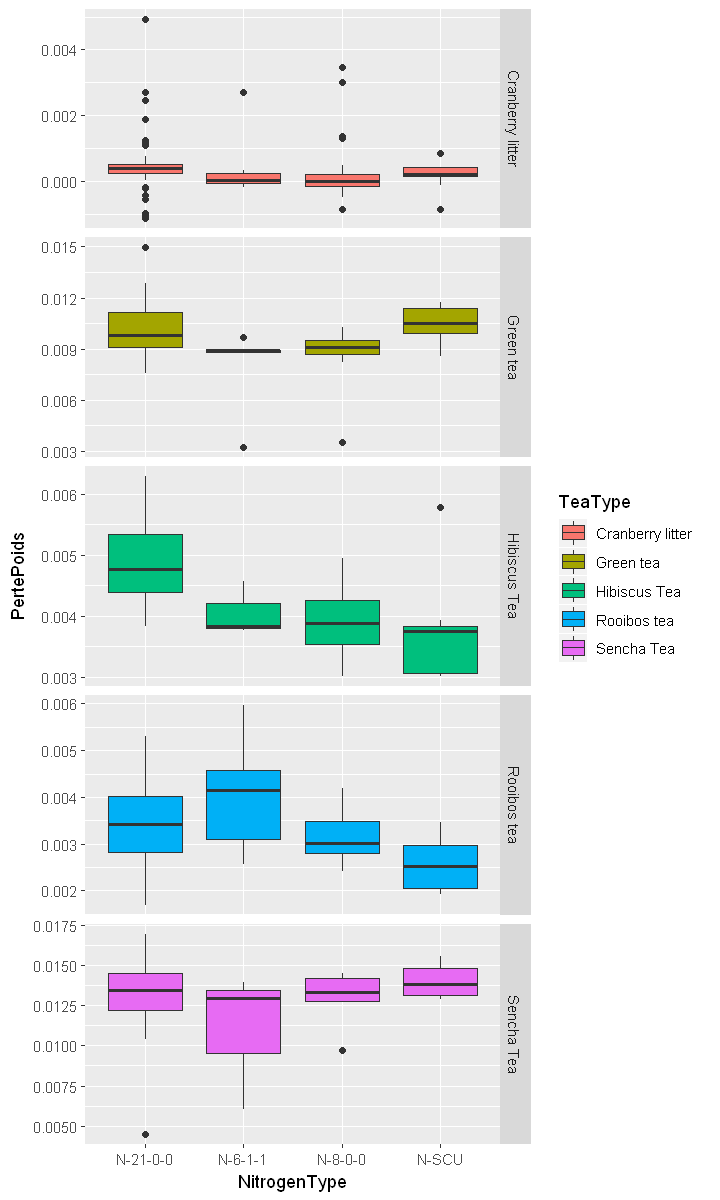

In [15]:
options(repr.plot.width=6, repr.plot.height=10)
ggplot(data = donnee,
       mapping = aes(x = NitrogenType, y = PertePoids)) +
  facet_grid(TeaType ~ ., scales = "free") +
  geom_boxplot(mapping = aes(fill = TeaType))

In [16]:
# Label repetitions in such a way they are unique per field and dose
donnee$DoseRep = paste0(donnee$Dose, '_', donnee$Repetition,'_', donnee$Site)
#donnee_CNS$DoseRep = paste0(donnee$Dose, '_', donnee$Repetition)

In [17]:
# Cranberry residues are the reference to assess the effect
# of the kind of matter analysed
#donnee$TeaType = relevel(donnee$SorteThe, ref = 'ResidusCanneberge')
donnee$TeaType = relevel(donnee$TeaType, ref = 'Cranberry litter')
#donnee$TeaType = relevel(donnee$TeaType, ref = 'Green tea')
#donnee_CNS$SorteThe = relevel(donnee_CNS$SorteThe, ref = 'ResidusCanneberge')

 MODELISATION MIXTE

In [18]:
head(donnee)

No,TypeThe,TeaType,PoidsContenu_g,PoidsTotal._g,PoidsSac_g,Poids_Restant_g,Farmers,Site,Regie,...,Teneur_Ci,GreenTMoy_C,GreenTMoy_N,GreenTMoy_S,Teneur_Cf,Teneur_Nf,Teneur_Sf,PertePoids,TauxDecomposition_C,DoseRep
1,G,Green tea,1.793,2.019,0.226,0.783,Belanger,A9,Biologique,...,0.8605444,"47,99466667","3,377","0,193666667",0.3926275,0.04134945,0.00227070,0.009205698,0.008718931,_1_A9
2,G,Green tea,1.786,2.011,0.225,0.797,Belanger,A9,Biologique,...,0.8571847,Rooibos teaMoy_C,Rooibos teaMoy_N,Rooibos teaMoy_S,0.4059360,0.03513335,0.00200047,0.008965323,0.008305088,_1_A9
3,G,Green tea,1.782,2.008,0.228,NA,Belanger,A9,Biologique,...,0.8552650,"47,79166667","1,040022222","0,090222222",NA,NA,NA,NA,NA,_1_A9
4,G,Green tea,1.760,1.987,0.227,0.778,Belanger,A9,Biologique,...,0.8447061,ResiduCan_C,ResiduCan_N,ResiduCan_S,0.3912718,0.04232087,0.00230288,0.009070473,0.008550960,_2_A9
5,G,Green tea,1.788,2.013,0.226,0.779,Belanger,A9,Biologique,...,0.8581446,"50,033","0,90172","0,0757",0.3717232,0.03796456,0.00215783,0.009231577,0.009295812,_2_A9
6,G,Green tea,1.779,2.004,0.227,NA,Belanger,A9,Biologique,...,0.8538251,Hibiscus TeaTMoy_C,Hibiscus TeaTMoy_N,Hibiscus TeaTMoy_S,NA,NA,NA,NA,NA,_2_A9


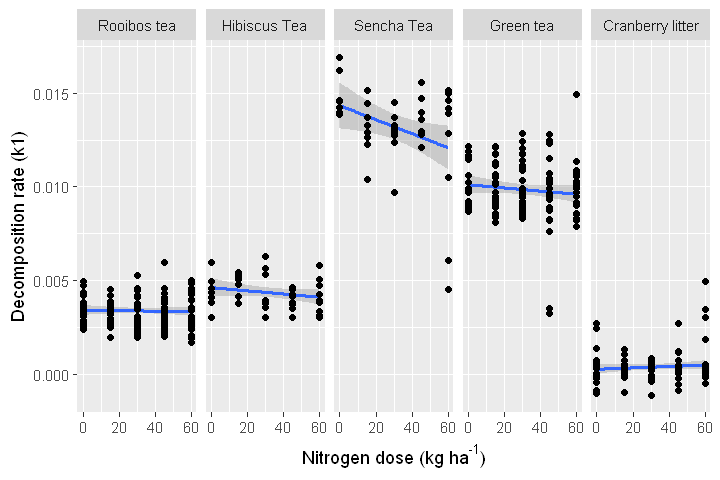

In [19]:
# 1. What's affecting weight difference?
## prepare data
weightdiff_data = donnee %>%
  select(PertePoids,#C_over_N,
         TeaType, NitrogenType, DoseN, Farmers, Site, DoseRep) %>%
  drop_na(.) %>%
  droplevels(.)
weightdiff_data_factor <- weightdiff_data
weightdiff_data_factor$TeaType <- factor(weightdiff_data$TeaType, 
                                  levels = levels(weightdiff_data$TeaType)[c(4,3,5,2,1)]) # Reorder

options(repr.plot.width=6, repr.plot.height=4)

ggplot(weightdiff_data_factor, aes(x=DoseN, y=PertePoids)) +
  facet_grid(. ~ TeaType) +
  geom_smooth(method='lm') +
  labs(x = expression("Nitrogen dose (kg ha"^"-1"*")"),
       y = "Decomposition rate (k1)") +     #expression(frac(-ln(frac(Final~weight, Initial~weight)), 90))) +
  geom_point()

In [20]:
ggsave("Figure1.png", width = 10, height = 6, dpi = 600)# export plot high resolution

mixed model

In [21]:
weightdiff_data$DoseN_scaled = scale(weightdiff_data$DoseN)

In [22]:
weightdiff_mm <- lme(fixed = PertePoids ~ TeaType + #C_over_N + 
                       NitrogenType + DoseN_scaled*TeaType,
                     random = ~ 1 | Farmers/Site, #/DoseRep,
                     data = weightdiff_data)

In [23]:
summary(weightdiff_mm)

Linear mixed-effects model fit by REML
 Data: weightdiff_data 
        AIC       BIC   logLik
  -4768.036 -4702.146 2400.018

Random effects:
 Formula: ~1 | Farmers
        (Intercept)
StdDev: 0.000455883

 Formula: ~1 | Site %in% Farmers
         (Intercept)   Residual
StdDev: 0.0005370296 0.00114188

Fixed effects: PertePoids ~ TeaType + NitrogenType + DoseN_scaled * TeaType 
                                        Value    Std.Error  DF  t-value p-value
(Intercept)                       0.000263586 0.0004452691 451  0.59197  0.5542
TeaTypeGreen tea                  0.009430244 0.0001437320 451 65.60990  0.0000
TeaTypeHibiscus Tea               0.003919104 0.0002016727 451 19.43299  0.0000
TeaTypeRooibos tea                0.002965359 0.0001438861 451 20.60907  0.0000
TeaTypeSencha Tea                 0.012679921 0.0002071557 451 61.20962  0.0000
NitrogenTypeN-6-1-1               0.000375193 0.0004117926 451  0.91112  0.3627
NitrogenTypeN-8-0-0               0.000541718 0.0004462445 

In [24]:
anova(weightdiff_mm)

,numDF,denDF,F-value,p-value
(Intercept),1,451,153.9293881,0.000000000
TeaType,4,451,1671.0689584,0.000000000
NitrogenType,3,451,0.6582364,0.578117220
DoseN_scaled,1,451,4.0203558,0.045551301
TeaType:DoseN_scaled,4,451,4.7001931,0.001003031


In [25]:
pseudoR2(y = weightdiff_data$PertePoids,
         y_hat = predict(weightdiff_mm, level = 0))

[1] 0.9233087

Warning message:
"package 'e1071' was built under R version 3.6.2"

[1] "Shapiro-Wilk:"

	Shapiro-Wilk normality test

data:  r
W = 0.89819, p-value < 2.2e-16

[1] "Kurtosis: 7.23353285294641"
[1] "Skewness: -0.718410912629998"


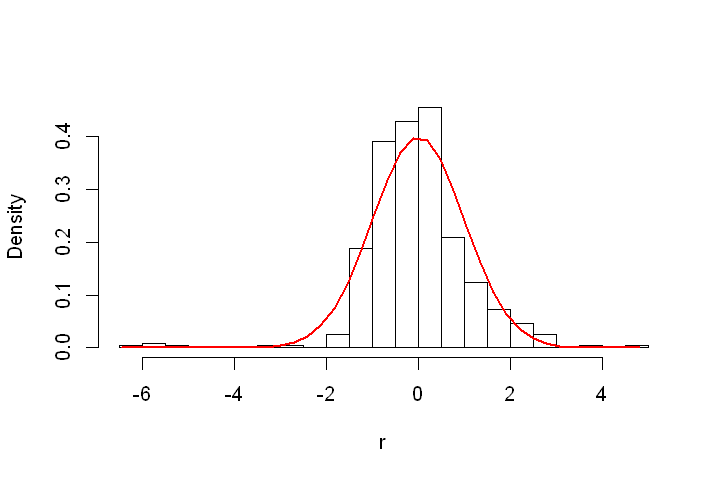

In [26]:
residues(weightdiff_mm)

In [27]:
library('e1071')

In [28]:
weightdiff_gg = data.frame(intervals(weightdiff_mm, which = "fixed")$fixed)

In [29]:
weightdiff_gg$pvalue = summary(weightdiff_mm)$tTable[, 5]

In [30]:
weightdiff_gg$is_significant = ifelse(weightdiff_gg$pvalue <= 0.05,
                                      'Significant at 0.05 level',
                                      'Not significant at 0.05 level')

In [31]:
weightdiff_gg$variable = rownames(weightdiff_gg)

In [32]:
weightdiff_gg

,lower,est.,upper,pvalue,is_significant,variable
(Intercept),-0.0006114733,2.635865e-04,1.138646e-03,5.541665e-01,Not significant at 0.05 level,(Intercept)
TeaTypeGreen tea,0.0091477761,9.430244e-03,9.712711e-03,7.979065e-233,Significant at 0.05 level,TeaTypeGreen tea
TeaTypeHibiscus Tea,0.0035227689,3.919104e-03,4.315439e-03,1.476689e-61,Significant at 0.05 level,TeaTypeHibiscus Tea
TeaTypeRooibos tea,0.0026825883,2.965359e-03,3.248129e-03,5.528742e-67,Significant at 0.05 level,TeaTypeRooibos tea
TeaTypeSencha Tea,0.0122728105,1.267992e-02,1.308703e-02,1.345405e-220,Significant at 0.05 level,TeaTypeSencha Tea
NitrogenTypeN-6-1-1,-0.0004340772,3.751933e-04,1.184464e-03,3.627178e-01,Not significant at 0.05 level,NitrogenTypeN-6-1-1
NitrogenTypeN-8-0-0,-0.0003352582,5.417184e-04,1.418695e-03,2.254022e-01,Not significant at 0.05 level,NitrogenTypeN-8-0-0
NitrogenTypeN-SCU,-0.0001914179,1.964019e-04,5.842216e-04,3.201500e-01,Not significant at 0.05 level,NitrogenTypeN-SCU
DoseN_scaled,-0.0001090804,9.026628e-05,2.896129e-04,3.740044e-01,Not significant at 0.05 level,DoseN_scaled
TeaTypeGreen tea:DoseN_scaled,-0.0005561391,-2.729316e-04,1.027598e-05,5.887384e-02,Not significant at 0.05 level,TeaTypeGreen tea:DoseN_scaled


### Ajust name

In [33]:
weightdiff_gg$variable[c(2,3,4,5,6,7,8,10,11,12,13)] <- c('Green Tea','Hibiscus Tea','Rooibos Tea',
                                   'Sencha Tea', 'N-6-1-1','N-8-0-0', 'N-SCU-39-0-0',
                                   'Green Tea : DoseN_scaled',
                                   'Hibiscus Tea : DoseN_scaled','Rooibos Tea : DoseN_scaled',
                                   'Sencha Tea : DoseN_scaled')

In [34]:
weightdiff_gg$variable

[1] "(Intercept)"                 "Green Tea"                  
 [3] "Hibiscus Tea"                "Rooibos Tea"                
 [5] "Sencha Tea"                  "N-6-1-1"                    
 [7] "N-8-0-0"                     "N-SCU-39-0-0"               
 [9] "DoseN_scaled"                "Green Tea : DoseN_scaled"   
[11] "Hibiscus Tea : DoseN_scaled" "Rooibos Tea : DoseN_scaled" 
[13] "Sencha Tea : DoseN_scaled"

In [35]:
target <- c('(Intercept)',"Hibiscus Tea", "Rooibos Tea", "Sencha Tea", "Green Tea",'N-6-1-1','N-8-0-0', 
            'N-SCU-39-0-0',"DoseN_scaled", 'Green Tea : DoseN_scaled', 
            'Sencha Tea : DoseN_scaled', 'Rooibos Tea : DoseN_scaled', 'Hibiscus Tea : DoseN_scaled')

In [36]:
target 

[1] "(Intercept)"                 "Hibiscus Tea"               
 [3] "Rooibos Tea"                 "Sencha Tea"                 
 [5] "Green Tea"                   "N-6-1-1"                    
 [7] "N-8-0-0"                     "N-SCU-39-0-0"               
 [9] "DoseN_scaled"                "Green Tea : DoseN_scaled"   
[11] "Sencha Tea : DoseN_scaled"   "Rooibos Tea : DoseN_scaled" 
[13] "Hibiscus Tea : DoseN_scaled"

In [37]:
weightdiff_gg$variable

[1] "(Intercept)"                 "Green Tea"                  
 [3] "Hibiscus Tea"                "Rooibos Tea"                
 [5] "Sencha Tea"                  "N-6-1-1"                    
 [7] "N-8-0-0"                     "N-SCU-39-0-0"               
 [9] "DoseN_scaled"                "Green Tea : DoseN_scaled"   
[11] "Hibiscus Tea : DoseN_scaled" "Rooibos Tea : DoseN_scaled" 
[13] "Sencha Tea : DoseN_scaled"

In [38]:
weightdiff_gg <- weightdiff_gg[match(target, weightdiff_gg$variable),] 

In [39]:
weightdiff_gg

,lower,est.,upper,pvalue,is_significant,variable
(Intercept),-0.0006114733,2.635865e-04,1.138646e-03,5.541665e-01,Not significant at 0.05 level,(Intercept)
TeaTypeHibiscus Tea,0.0035227689,3.919104e-03,4.315439e-03,1.476689e-61,Significant at 0.05 level,Hibiscus Tea
TeaTypeRooibos tea,0.0026825883,2.965359e-03,3.248129e-03,5.528742e-67,Significant at 0.05 level,Rooibos Tea
TeaTypeSencha Tea,0.0122728105,1.267992e-02,1.308703e-02,1.345405e-220,Significant at 0.05 level,Sencha Tea
TeaTypeGreen tea,0.0091477761,9.430244e-03,9.712711e-03,7.979065e-233,Significant at 0.05 level,Green Tea
NitrogenTypeN-6-1-1,-0.0004340772,3.751933e-04,1.184464e-03,3.627178e-01,Not significant at 0.05 level,N-6-1-1
NitrogenTypeN-8-0-0,-0.0003352582,5.417184e-04,1.418695e-03,2.254022e-01,Not significant at 0.05 level,N-8-0-0
NitrogenTypeN-SCU,-0.0001914179,1.964019e-04,5.842216e-04,3.201500e-01,Not significant at 0.05 level,N-SCU-39-0-0
DoseN_scaled,-0.0001090804,9.026628e-05,2.896129e-04,3.740044e-01,Not significant at 0.05 level,DoseN_scaled
TeaTypeGreen tea:DoseN_scaled,-0.0005561391,-2.729316e-04,1.027598e-05,5.887384e-02,Not significant at 0.05 level,Green Tea : DoseN_scaled


In [40]:
weightdiff_gg$facet = factor(c('Intercept',
                               'Tea type', 'Tea type', 'Tea type', 'Tea type',
                               'N source', 'N source', 'N source',
                               'N dosage',
                               'Tea type x N dosage', 'Tea type x N dosage', 
                               'Tea type x N dosage', 'Tea type x N dosage'))

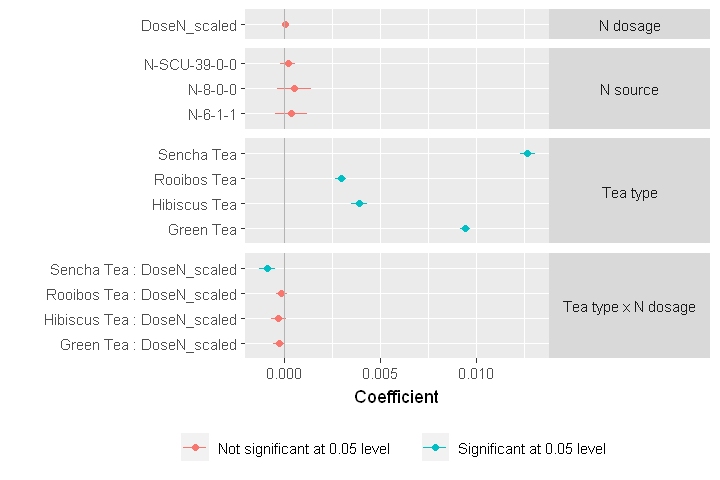

In [41]:
weightdiff_gg = weightdiff_gg[-1, ] # remove the intercept
ggplot(weightdiff_gg, aes(x = est., y=variable, colour=is_significant)) +
  facet_grid(facet ~ ., scales = 'free', space = 'free') +
  geom_point() +
  geom_segment(aes(x=lower, xend=upper, y=variable, yend=variable)) +
  geom_vline(xintercept = 0, colour='grey70') +
  xlab('Coefficient') +
  ylab('') +
  theme(strip.text.y = element_text(angle=0),
        legend.title = element_blank(),
        legend.position = "bottom")

In [42]:
ggsave("Figure2.png", width = 8, height = 5, dpi = 600)# export plot high resolution

# 2. What is affecting the organic matter decomposition rate?

In [43]:
omdecomp_data = donnee %>%
  select(TauxDecomposition_C, TeaType, DoseN, Farmers,Site, #C_over_N, 
         DoseRep,NitrogenType) %>%
  drop_na(.) %>%
  droplevels(.)

In [44]:
omdecomp_data_factor <- omdecomp_data

In [45]:
omdecomp_data_factor$TeaType <- factor(omdecomp_data$TeaType, 
                                         levels = levels(omdecomp_data$TeaType)[c(4,3,5,2,1)]) # Reorder

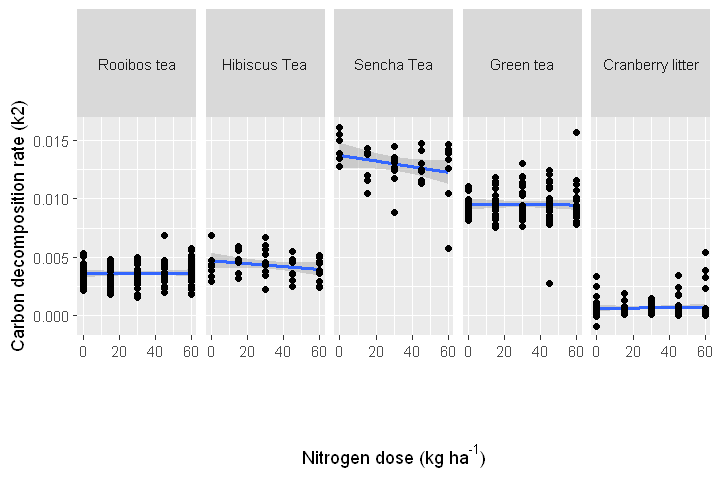

In [46]:
ggplot(omdecomp_data_factor, aes(x=DoseN, y=TauxDecomposition_C)) +
  facet_grid(. ~ TeaType) +
  geom_smooth(method='lm') +
  labs(x = expression("Nitrogen dose (kg ha"^"-1"*")"),
       y = "Carbon decomposition rate (k2)")+      #expression( frac(Initial~carbon - Final~carbon, Initial~carbon) %*% 100)) +
  geom_point(aes())

In [47]:
ggsave("Figure3.png", width = 10, height = 6, dpi = 600)# export plot high resolution

In [48]:
omdecomp_data$DoseN_sc = scale(omdecomp_data$DoseN)

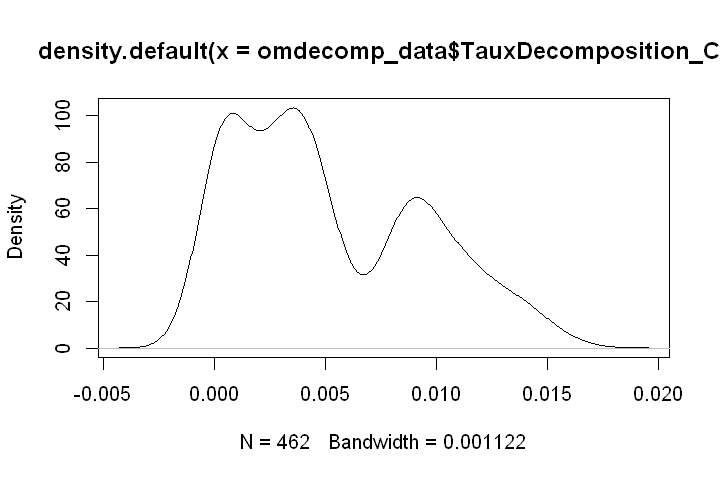

In [49]:
plot(density(omdecomp_data$TauxDecomposition_C))

In [50]:
omdecomp_mm = lme(fixed = TauxDecomposition_C ~ TeaType + #C_over_N+  
                    NitrogenType + DoseN_sc*TeaType,
                  random = ~ 1 | Farmers/Site, #/DoseRep,
                  data = omdecomp_data) # [omdecomp_data$TauxDecomposition_C > 0, ]

In [51]:
summary(omdecomp_mm)

Linear mixed-effects model fit by REML
 Data: omdecomp_data 
        AIC       BIC   logLik
  -4747.045 -4681.333 2389.523

Random effects:
 Formula: ~1 | Farmers
         (Intercept)
StdDev: 0.0007871417

 Formula: ~1 | Site %in% Farmers
         (Intercept)    Residual
StdDev: 0.0005784149 0.001100016

Fixed effects: TauxDecomposition_C ~ TeaType + NitrogenType + DoseN_sc * TeaType 
                                    Value    Std.Error  DF  t-value p-value
(Intercept)                   0.000443399 0.0006443621 446  0.68812  0.4917
TeaTypeGreen tea              0.008822891 0.0001391060 446 63.42567  0.0000
TeaTypeHibiscus Tea           0.003595978 0.0001943220 446 18.50525  0.0000
TeaTypeRooibos tea            0.002893159 0.0001386969 446 20.85957  0.0000
TeaTypeSencha Tea             0.012284444 0.0002057508 446 59.70544  0.0000
NitrogenTypeN-6-1-1           0.000745590 0.0004118709 446  1.81025  0.0709
NitrogenTypeN-8-0-0           0.000959404 0.0004517565 446  2.12372  0.0342
Nitr

In [52]:
ranef(omdecomp_mm)

,(Intercept)
Belanger,-0.0004854827
Fortier,0.0004854827
,(Intercept)
Belanger/10,0.0002882287
Belanger/A9,-0.0005503770
Fortier/45,-0.0001914391
Fortier/9,0.0004535873


In [53]:
summary(omdecomp_mm)$tTable

,Value,Std.Error,DF,t-value,p-value
(Intercept),4.433987e-04,6.443621e-04,446,0.6881205,4.917347e-01
TeaTypeGreen tea,8.822891e-03,1.391060e-04,446,63.4256748,2.561534e-225
TeaTypeHibiscus Tea,3.595978e-03,1.943220e-04,446,18.5052518,3.789634e-57
TeaTypeRooibos tea,2.893159e-03,1.386969e-04,446,20.8595749,6.136265e-68
TeaTypeSencha Tea,1.228444e-02,2.057508e-04,446,59.7054429,7.675671e-215
NitrogenTypeN-6-1-1,7.455896e-04,4.118709e-04,446,1.8102509,7.092975e-02
NitrogenTypeN-8-0-0,9.594040e-04,4.517565e-04,446,2.1237194,3.424343e-02
NitrogenTypeN-SCU,8.182410e-05,1.910864e-04,446,0.4282046,6.687088e-01
DoseN_sc,7.703243e-05,9.769079e-05,446,0.7885331,4.308039e-01
TeaTypeGreen tea:DoseN_sc,-1.008785e-04,1.394315e-04,446,-0.7234987,4.697529e-01


In [54]:
anova(omdecomp_mm)

,numDF,denDF,F-value,p-value
(Intercept),1,446,68.3602724,1.554312e-15
TeaType,4,446,1571.5007307,0.000000e+00
NitrogenType,3,446,1.6630815,1.742224e-01
DoseN_sc,1,446,0.4545346,5.005386e-01
TeaType:DoseN_sc,4,446,2.2442499,6.344782e-02


In [55]:
pseudoR2(y=omdecomp_data$TauxDecomposition_C, # [omdecomp_data$TauxDecomposition_C > 0]
         y_hat = predict(omdecomp_mm, level=2))

[1] 0.9352114

[1] "Shapiro-Wilk:"

	Shapiro-Wilk normality test

data:  r
W = 0.94242, p-value = 2.126e-12

[1] "Kurtosis: 4.65933864193074"
[1] "Skewness: -0.123032795965418"


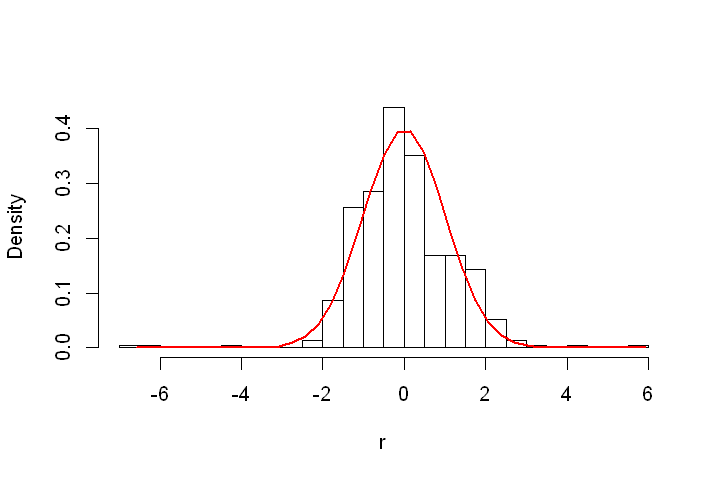

In [56]:
residues(omdecomp_mm)

In [57]:
omdecomp_gg = data.frame(intervals(omdecomp_mm, which = "fixed")$fixed)

In [58]:
omdecomp_gg$pvalue = summary(omdecomp_mm)$tTable[, 5]

In [59]:
omdecomp_gg$is_significant = ifelse(omdecomp_gg$pvalue <= 0.05,
                                    'Significant at 0.05 level',
                                    'Not significant at 0.05 level')

In [60]:
omdecomp_gg$variable = rownames(omdecomp_gg)

In [61]:
omdecomp_gg$variable[c(2,3,4,5,6,7,8,10,11,12,13)] <- c('Green tea', 'Hibiscus tea', 'Rooibos tea',
                                                          'Sencha tea', 'N-6-1-1','N-8-0-0', 'N-SCU-39-0-0',
                                                          'Green tea : DoseN_scaled',
                                                          'Hibiscus tea : DoseN_scaled', 'Rooibos tea : DoseN_scaled',
                                                          'Sencha tea : DoseN_scaled')
omdecomp_gg$facet = factor(c('Intercept',
                             'Tea type', 'Tea type', 'Tea type', 'Tea type',
                             'N source', 'N source', 'N source',
                             'N dosage',
                             'Tea type x N dosage', 'Tea type x N dosage', 'Tea type x N dosage', 'Tea type x N dosage'))

In [62]:
omdecomp_gg = omdecomp_gg[-1, ] # remove the intercept

In [63]:
droplevels(omdecomp_gg)

,lower,est.,upper,pvalue,is_significant,variable,facet
TeaTypeGreen tea,8.549506e-03,8.822891e-03,9.096275e-03,2.561534e-225,Significant at 0.05 level,Green tea,Tea type
TeaTypeHibiscus Tea,3.214078e-03,3.595978e-03,3.977879e-03,3.789634e-57,Significant at 0.05 level,Hibiscus tea,Tea type
TeaTypeRooibos tea,2.620578e-03,2.893159e-03,3.165740e-03,6.136265e-68,Significant at 0.05 level,Rooibos tea,Tea type
TeaTypeSencha Tea,1.188008e-02,1.228444e-02,1.268881e-02,7.675671e-215,Significant at 0.05 level,Sencha tea,Tea type
NitrogenTypeN-6-1-1,-6.385904e-05,7.455896e-04,1.555038e-03,7.092975e-02,Not significant at 0.05 level,N-6-1-1,N source
NitrogenTypeN-8-0-0,7.156827e-05,9.594040e-04,1.847240e-03,3.424343e-02,Significant at 0.05 level,N-8-0-0,N source
NitrogenTypeN-SCU,-2.937175e-04,8.182410e-05,4.573657e-04,6.687088e-01,Not significant at 0.05 level,N-SCU-39-0-0,N source
DoseN_sc,-1.149590e-04,7.703243e-05,2.690239e-04,4.308039e-01,Not significant at 0.05 level,DoseN_sc,N dosage
TeaTypeGreen tea:DoseN_sc,-3.749029e-04,-1.008785e-04,1.731459e-04,4.697529e-01,Not significant at 0.05 level,Green tea : DoseN_scaled,Tea type x N dosage
TeaTypeHibiscus Tea:DoseN_sc,-6.847812e-04,-3.031261e-04,7.852901e-05,1.192520e-01,Not significant at 0.05 level,Hibiscus tea : DoseN_scaled,Tea type x N dosage


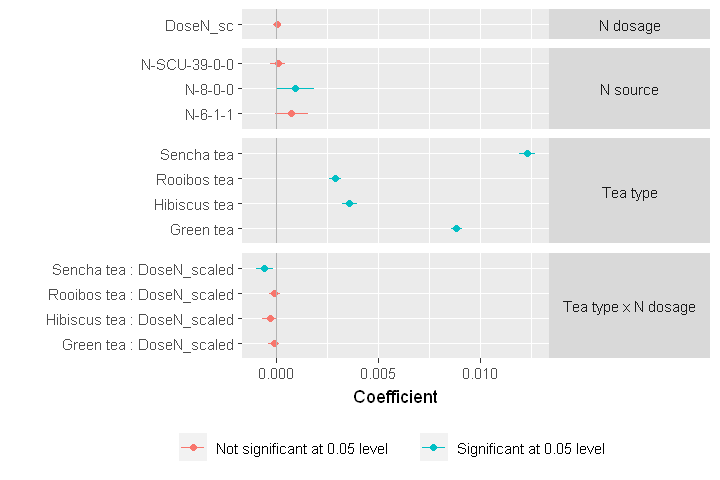

In [64]:
ggplot(omdecomp_gg, aes(x = est., y=variable, colour=is_significant)) +
  facet_grid(facet ~ ., scales = 'free', space = 'free') +
  geom_point() +
  geom_segment(aes(x=lower, xend=upper, y=variable, yend=variable)) +
  geom_vline(xintercept = 0, colour='grey70') +
  xlab('Coefficient') +
  ylab('') +
  theme(strip.text.y = element_text(angle=0),
        legend.title = element_blank(),
        legend.position = "bottom")

In [65]:
ggsave("Figure4.png", width = 8, height = 5, dpi = 600)# export plot high resolution

In [66]:
#write.table(donnee, file = "donneeEXP.csv", 
 #           dec=',', sep=';')

**Tea bag index**

In [67]:
head(donnee)

No,TypeThe,TeaType,PoidsContenu_g,PoidsTotal._g,PoidsSac_g,Poids_Restant_g,Farmers,Site,Regie,...,Teneur_Ci,GreenTMoy_C,GreenTMoy_N,GreenTMoy_S,Teneur_Cf,Teneur_Nf,Teneur_Sf,PertePoids,TauxDecomposition_C,DoseRep
1,G,Green tea,1.793,2.019,0.226,0.783,Belanger,A9,Biologique,...,0.8605444,"47,99466667","3,377","0,193666667",0.3926275,0.04134945,0.00227070,0.009205698,0.008718931,_1_A9
2,G,Green tea,1.786,2.011,0.225,0.797,Belanger,A9,Biologique,...,0.8571847,Rooibos teaMoy_C,Rooibos teaMoy_N,Rooibos teaMoy_S,0.4059360,0.03513335,0.00200047,0.008965323,0.008305088,_1_A9
3,G,Green tea,1.782,2.008,0.228,NA,Belanger,A9,Biologique,...,0.8552650,"47,79166667","1,040022222","0,090222222",NA,NA,NA,NA,NA,_1_A9
4,G,Green tea,1.760,1.987,0.227,0.778,Belanger,A9,Biologique,...,0.8447061,ResiduCan_C,ResiduCan_N,ResiduCan_S,0.3912718,0.04232087,0.00230288,0.009070473,0.008550960,_2_A9
5,G,Green tea,1.788,2.013,0.226,0.779,Belanger,A9,Biologique,...,0.8581446,"50,033","0,90172","0,0757",0.3717232,0.03796456,0.00215783,0.009231577,0.009295812,_2_A9
6,G,Green tea,1.779,2.004,0.227,NA,Belanger,A9,Biologique,...,0.8538251,Hibiscus TeaTMoy_C,Hibiscus TeaTMoy_N,Hibiscus TeaTMoy_S,NA,NA,NA,NA,NA,_2_A9


In [68]:
donnee$M_surM0 <- donnee$Poids_Restant_g / donnee$PoidsContenu_g

In [69]:
Hf_g = 0.805 #pour nos donnee
Hf_r = 0.826

In [70]:
#Hf_g = 0.842 #pour keuskamp
#Hf_r = 0.552

In [71]:
donnee$a = NA
donnee$k_tbi = NA

In [72]:
donnee$a[donnee$TeaType == "Green tea"] = (donnee$PoidsContenu_g[donnee$TeaType == "Green tea"] -
                                            donnee$Poids_Restant_g[donnee$TeaType == "Green tea"]) /
                                            donnee$PoidsContenu_g[donnee$TeaType == "Green tea"]

In [73]:
donnee$S = 1 - donnee$a/Hf_g

In [74]:
head(donnee$S)

[1] 0.3002463 0.3121101        NA 0.3068888 0.2989843        NA

In [75]:
sdr = paste(donnee$Site, donnee$DoseN, donnee$Repetition)
sdr_u = unique(sdr)

In [76]:
for (i in 1:length(sdr_u)) {
  Sg_i = mean(donnee$S[sdr == sdr_u[i] & donnee$TeaType == "Green tea"], na.rm = TRUE)
  
  # Rooibos
  donnee$a[sdr == sdr_u[i] & donnee$TeaType == "Rooibos tea"] = Hf_r * (1 - Sg_i)
  ar_i = donnee$a[sdr == sdr_u[i] & donnee$TeaType == "Rooibos tea"]
  M_surM0_i = donnee$M_surM0[sdr == sdr_u[i] & donnee$TeaType == "Rooibos tea"]
  donnee$k_tbi[sdr == sdr_u[i] & donnee$TeaType == "Rooibos tea"] = log(ar_i / (M_surM0_i - (1-ar_i))) / 90
  
  
}

In [77]:
donnee_a_rooibos <- subset(donnee, TeaType == "Rooibos tea")

In [78]:
head(donnee_a_rooibos)

,No,TypeThe,TeaType,PoidsContenu_g,PoidsTotal._g,PoidsSac_g,Poids_Restant_g,Farmers,Site,Regie,...,Teneur_Cf,Teneur_Nf,Teneur_Sf,PertePoids,TauxDecomposition_C,DoseRep,M_surM0,a,k_tbi,S
37,1,S,Rooibos tea,1.905,2.134,0.229,1.534,Belanger,A9,Biologique,...,0.6845322,0.009211056,0.000458666,0.002406703,0.003168697,_1_A9,0.8052493,0.5730968,0.004613835,NA
38,2,S,Rooibos tea,1.892,2.118,0.226,1.497,Belanger,A9,Biologique,...,0.6911499,0.014206530,0.000634728,0.002601904,0.002985712,_1_A9,0.7912262,0.5730968,0.005033486,NA
39,3,S,Rooibos tea,1.895,2.122,0.228,1.342,Belanger,A9,Biologique,...,0.6611229,0.009743054,0.000452254,0.003833976,0.003496839,_1_A9,0.7081794,0.5730968,0.007907971,NA
40,4,S,Rooibos tea,1.907,2.138,0.231,1.308,Belanger,A9,Biologique,...,0.6669623,0.012376688,0.000542820,0.004189245,0.003469269,_2_A9,0.6858941,0.5757744,0.008762639,NA
41,5,S,Rooibos tea,1.910,2.137,0.227,1.532,Belanger,A9,Biologique,...,0.7512928,0.013588687,0.000543860,0.002450324,0.002163824,_2_A9,0.8020942,0.5757744,0.004679658,NA
42,6,S,Rooibos tea,1.908,2.136,0.229,1.495,Belanger,A9,Biologique,...,0.7426413,0.011089761,0.000287040,0.002710326,0.002280876,_2_A9,0.7835430,0.5757744,0.005238998,NA


In [79]:
ar_mean <- mean(donnee_a_rooibos$a)

In [80]:
ar_mean

[1] 0.5980028

In [81]:
head(donnee_a_rooibos)

,No,TypeThe,TeaType,PoidsContenu_g,PoidsTotal._g,PoidsSac_g,Poids_Restant_g,Farmers,Site,Regie,...,Teneur_Cf,Teneur_Nf,Teneur_Sf,PertePoids,TauxDecomposition_C,DoseRep,M_surM0,a,k_tbi,S
37,1,S,Rooibos tea,1.905,2.134,0.229,1.534,Belanger,A9,Biologique,...,0.6845322,0.009211056,0.000458666,0.002406703,0.003168697,_1_A9,0.8052493,0.5730968,0.004613835,NA
38,2,S,Rooibos tea,1.892,2.118,0.226,1.497,Belanger,A9,Biologique,...,0.6911499,0.014206530,0.000634728,0.002601904,0.002985712,_1_A9,0.7912262,0.5730968,0.005033486,NA
39,3,S,Rooibos tea,1.895,2.122,0.228,1.342,Belanger,A9,Biologique,...,0.6611229,0.009743054,0.000452254,0.003833976,0.003496839,_1_A9,0.7081794,0.5730968,0.007907971,NA
40,4,S,Rooibos tea,1.907,2.138,0.231,1.308,Belanger,A9,Biologique,...,0.6669623,0.012376688,0.000542820,0.004189245,0.003469269,_2_A9,0.6858941,0.5757744,0.008762639,NA
41,5,S,Rooibos tea,1.910,2.137,0.227,1.532,Belanger,A9,Biologique,...,0.7512928,0.013588687,0.000543860,0.002450324,0.002163824,_2_A9,0.8020942,0.5757744,0.004679658,NA
42,6,S,Rooibos tea,1.908,2.136,0.229,1.495,Belanger,A9,Biologique,...,0.7426413,0.011089761,0.000287040,0.002710326,0.002280876,_2_A9,0.7835430,0.5757744,0.005238998,NA


In [82]:
head(donnee)

No,TypeThe,TeaType,PoidsContenu_g,PoidsTotal._g,PoidsSac_g,Poids_Restant_g,Farmers,Site,Regie,...,Teneur_Cf,Teneur_Nf,Teneur_Sf,PertePoids,TauxDecomposition_C,DoseRep,M_surM0,a,k_tbi,S
1,G,Green tea,1.793,2.019,0.226,0.783,Belanger,A9,Biologique,...,0.3926275,0.04134945,0.00227070,0.009205698,0.008718931,_1_A9,0.4366983,0.5633017,NA,0.3002463
2,G,Green tea,1.786,2.011,0.225,0.797,Belanger,A9,Biologique,...,0.4059360,0.03513335,0.00200047,0.008965323,0.008305088,_1_A9,0.4462486,0.5537514,NA,0.3121101
3,G,Green tea,1.782,2.008,0.228,NA,Belanger,A9,Biologique,...,NA,NA,NA,NA,NA,_1_A9,NA,NA,NA,NA
4,G,Green tea,1.760,1.987,0.227,0.778,Belanger,A9,Biologique,...,0.3912718,0.04232087,0.00230288,0.009070473,0.008550960,_2_A9,0.4420455,0.5579545,NA,0.3068888
5,G,Green tea,1.788,2.013,0.226,0.779,Belanger,A9,Biologique,...,0.3717232,0.03796456,0.00215783,0.009231577,0.009295812,_2_A9,0.4356823,0.5643177,NA,0.2989843
6,G,Green tea,1.779,2.004,0.227,NA,Belanger,A9,Biologique,...,NA,NA,NA,NA,NA,_2_A9,NA,NA,NA,NA


## Exploration des données TBI pour type de dose N

In [83]:
donnee %>%
  select(NitrogenType, DoseN) %>%
  unique()

,NitrogenType,DoseN
1,N-8-0-0,0
7,N-8-0-0,15
13,N-8-0-0,30
19,N-8-0-0,45
25,N-8-0-0,60
31,N-6-1-1,60
33,N-6-1-1,45
35,N-6-1-1,30
73,N-21-0-0,0
79,N-21-0-0,15


Warning message:
"Removed 388 rows containing non-finite values (stat_boxplot)."

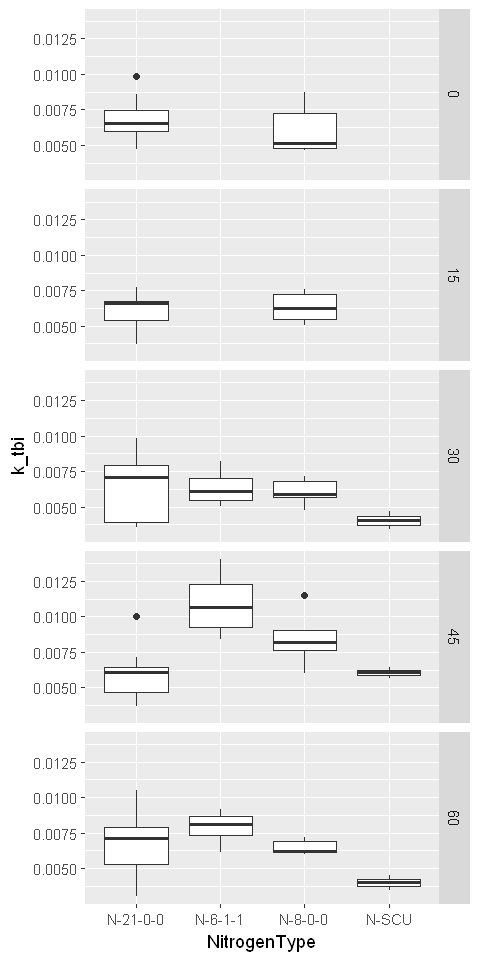

In [84]:
options(repr.plot.width=4, repr.plot.height=8)
ggplot(data = donnee,
       mapping = aes(x = NitrogenType, y = k_tbi)) +
  facet_grid(DoseN ~ .) +
  geom_boxplot()

In [85]:
#donnee1 <- donnee[c(2,3,4,5,6,7,8,9,10,11,12,13)]

In [86]:
#donnee1

In [87]:
#donnee$Site

In [88]:
TBI_data = donnee %>%
  select(k_tbi, TeaType, Farmers,DoseN, Site, #C_over_N, 
         NitrogenType) %>%
  drop_na(.) %>%
  droplevels(.)
#TBI_data_factor <- TBI_data
#TBI_data_factor$TeaType <- factor(TBI_data$TeaType, 
 #                                      levels = levels(omdecomp_data$TeaType)[c(4,3,5,2,1)]) # Reorder

In [89]:
#head(TBI_data)

In [90]:
mean_k_tbi <- mean(TBI_data$k_tbi)

In [91]:
mean_k_tbi

[1] 0.006528233

In [92]:
sd_k_tbi <- sd(TBI_data$k_tbi)

In [93]:
sd_k_tbi

[1] 0.001851479

In [94]:
TBI_rooibos <- subset(TBI_data, TeaType == "Rooibos tea")

In [95]:
lme_TBI <- lme(fixed = k_tbi ~  DoseN + NitrogenType,
    random = ~ 1 | Farmers/Site, #/DoseRep,
    data = TBI_rooibos) # [omdecomp_data$TauxDecomposition_C > 0, ]

Linear mixed-effects model fit by REML
 Data: TBI_rooibos 
        AIC       BIC   logLik
  -1201.875 -1179.377 608.9374

Random effects:
 Formula: ~1 | Farmers
        (Intercept)
StdDev: 0.001058691

 Formula: ~1 | Site %in% Farmers
         (Intercept)    Residual
StdDev: 0.0006061399 0.001526043

Fixed effects: k_tbi ~ DoseN + NitrogenType 
                           Value    Std.Error  DF   t-value p-value
(Intercept)          0.006164356 0.0008636613 120  7.137469  0.0000
DoseN                0.000003116 0.0000066639 120  0.467635  0.6409
NitrogenTypeN-6-1-1  0.002000522 0.0005863409 120  3.411876  0.0009
NitrogenTypeN-8-0-0  0.000668290 0.0006995885 120  0.955262  0.3414
NitrogenTypeN-SCU   -0.000407511 0.0006884892 120 -0.591892  0.5550
 Correlation: 
                    (Intr) DoseN  NTN-6- NTN-8-
DoseN               -0.237                     
NitrogenTypeN-6-1-1 -0.113 -0.165              
NitrogenTypeN-8-0-0 -0.209  0.029  0.536       
NitrogenTypeN-SCU   -0.020 -0.131  0.0

,(Intercept)
Belanger,-0.0006731745
Fortier,0.0006731745
,(Intercept)
Belanger/10,-0.0005293725
Belanger/A9,0.0003087068
Fortier/45,0.0003491925
Fortier/9,-0.0001285268


,Value,Std.Error,DF,t-value,p-value
(Intercept),6.164356e-03,8.636613e-04,120,7.1374693,7.871002e-11
DoseN,3.116282e-06,6.663922e-06,120,0.4676347,6.408939e-01
NitrogenTypeN-6-1-1,2.000522e-03,5.863409e-04,120,3.4118758,8.799726e-04
NitrogenTypeN-8-0-0,6.682900e-04,6.995885e-04,120,0.9552616,3.413659e-01
NitrogenTypeN-SCU,-4.075112e-04,6.884892e-04,120,-0.5918920,5.550364e-01


$names
 [1] "modelStruct"  "dims"         "contrasts"    "coefficients" "varFix"      
 [6] "sigma"        "apVar"        "logLik"       "numIter"      "groups"      
[11] "call"         "terms"        "method"       "fitted"       "residuals"   
[16] "fixDF"        "na.action"    "data"         "corFixed"     "tTable"      
[21] "BIC"          "AIC"         

$class
[1] "summary.lme" "lme"        

$verbose
[1] FALSE

$oClass
[1] "lme"

Approximate 95% confidence intervals

 Fixed effects:
                            lower          est.        upper
(Intercept)          4.454367e-03  6.164356e-03 7.874345e-03
DoseN               -1.007782e-05  3.116282e-06 1.631038e-05
NitrogenTypeN-6-1-1  8.396081e-04  2.000522e-03 3.161436e-03
NitrogenTypeN-8-0-0 -7.168465e-04  6.682900e-04 2.053426e-03
NitrogenTypeN-SCU   -1.770672e-03 -4.075112e-04 9.556494e-04
attr(,"label")
[1] "Fixed effects:"

 Random Effects:
  Level: Farmers 
                       lower        est.       upper
sd((Intercept)) 0.0001646521 0.001058691 0.006807244
  Level: Site 
                       lower         est.       upper
sd((Intercept)) 9.370808e-05 0.0006061399 0.003920746

 Within-group standard error:
      lower        est.       upper 
0.001344597 0.001526043 0.001731973 

,numDF,denDF,F-value,p-value
(Intercept),1,120,64.337170,7.901457e-13
DoseN,1,120,1.232408,2.691589e-01
NitrogenType,3,120,4.453493,5.283390e-03


[1] 0.3004398

[1] "Shapiro-Wilk:"

	Shapiro-Wilk normality test

data:  r
W = 0.9734, p-value = 0.01268

[1] "Kurtosis: 0.247117301424066"
[1] "Skewness: 0.52312331964216"


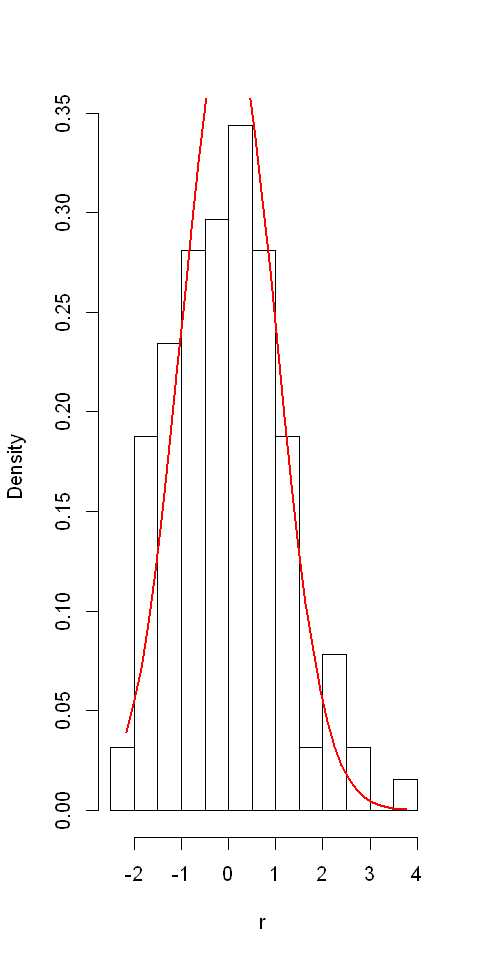

In [96]:
summary(lme_TBI)
ranef(lme_TBI)
summary(lme_TBI)$tTable
attributes(summary(lme_TBI))
intervals(lme_TBI)
anova(lme_TBI)
pseudoR2(y=TBI_rooibos$k_tbi, # [omdecomp_data$TauxDecomposition_C > 0]
         y_hat = predict(lme_TBI, level=1))
residues(lme_TBI)

In [97]:
weightdiff_gg_TBI = data.frame(intervals(lme_TBI, which = "fixed")$fixed)

In [98]:
weightdiff_gg_TBI$pvalue = summary(lme_TBI)$tTable[, 5]

In [99]:
weightdiff_gg_TBI$is_significant = ifelse(weightdiff_gg_TBI$pvalue <= 0.05,
                                      'Significant at 0.05 level',
                                      'Not significant at 0.05 level')

In [100]:
weightdiff_gg_TBI$variable = rownames(weightdiff_gg_TBI)

In [101]:
weightdiff_gg_TBI$variable

[1] "(Intercept)"         "DoseN"               "NitrogenTypeN-6-1-1"
[4] "NitrogenTypeN-8-0-0" "NitrogenTypeN-SCU"

In [102]:
weightdiff_gg_TBI$variable[c(3,4,5)] <- c('N-6-1-1', 'N-8-0-0',
                                   'N-SCU-39-0-0')

In [103]:
weightdiff_gg_TBI$facet = factor(c('Intercept','N dosage',
                               'N source', 'N source', 'N source'))

In [104]:
weightdiff_gg_TBI = weightdiff_gg_TBI[-1, ] # remove the intercept

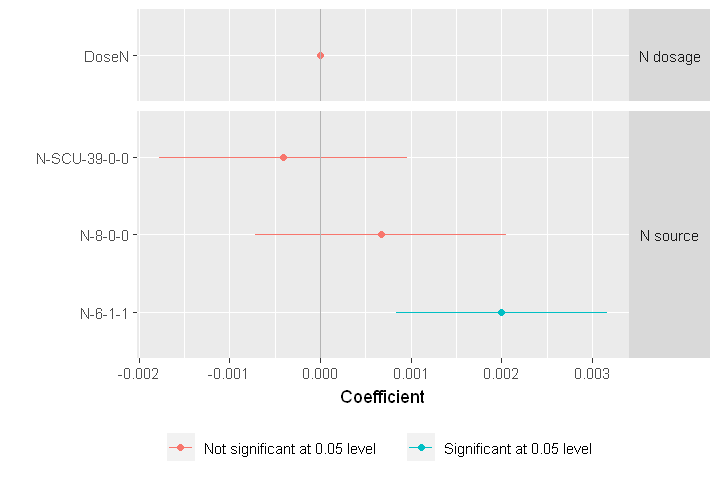

In [105]:
options(repr.plot.width=6, repr.plot.height=4)
ggplot(weightdiff_gg_TBI, aes(x = est., y=variable, colour=is_significant)) +
  facet_grid(facet ~ ., scales = 'free', space = 'free') +
  geom_point() +
  geom_segment(aes(x=lower, xend=upper, y=variable, yend=variable)) +
  geom_vline(xintercept = 0, colour='grey70') +
  xlab('Coefficient') +
  ylab('') +
  theme(strip.text.y = element_text(angle=0),
        legend.title = element_blank(),
        legend.position = "bottom")

In [106]:
ggsave("Figure5.png", width = 8, height = 5, dpi = 600)# export plot high resolution

In [107]:
S_data = donnee %>%
  select(S, TeaType, DoseN, Farmers,Site, #C_over_N, 
         NitrogenType) %>%
  drop_na(.) %>%
  droplevels(.)
#TBI_data_factor <- TBI_data
#TBI_data_factor$TeaType <- factor(TBI_data$TeaType, 
#                                      levels = levels(omdecomp_data$TeaType)[c(4,3,5,2,1)]) # Reorder

In [108]:
TBI_GreenTea <- subset(S_data, TeaType == "Green tea")

In [109]:
S_data

,S,TeaType,DoseN,Farmers,Site,NitrogenType
1,0.3002463,Green tea,0,Belanger,A9,N-8-0-0
2,0.3121101,Green tea,0,Belanger,A9,N-8-0-0
4,0.3068888,Green tea,0,Belanger,A9,N-8-0-0
5,0.2989843,Green tea,0,Belanger,A9,N-8-0-0
7,0.3053422,Green tea,15,Belanger,A9,N-8-0-0
8,0.3101040,Green tea,15,Belanger,A9,N-8-0-0
9,0.2575862,Green tea,15,Belanger,A9,N-8-0-0
10,0.3315385,Green tea,15,Belanger,A9,N-8-0-0
11,0.2912396,Green tea,15,Belanger,A9,N-8-0-0
12,0.2513402,Green tea,15,Belanger,A9,N-8-0-0


In [110]:
lme_S <- lme(fixed = S ~  DoseN + NitrogenType,
               random = ~ 1 | Farmers/Site, #/DoseRep,
               data = TBI_GreenTea) # [omdecomp_data$TauxDecomposition_C > 0, ]

Linear mixed-effects model fit by REML
 Data: TBI_GreenTea 
       AIC      BIC  logLik
  -279.136 -256.903 147.568

Random effects:
 Formula: ~1 | Farmers
         (Intercept)
StdDev: 3.723227e-06

 Formula: ~1 | Site %in% Farmers
        (Intercept)   Residual
StdDev:  0.04299008 0.06224558

Fixed effects: S ~ DoseN + NitrogenType 
                          Value  Std.Error  DF   t-value p-value
(Intercept)          0.24656689 0.02701601 116  9.126694  0.0000
DoseN                0.00042329 0.00027815 116  1.521808  0.1308
NitrogenTypeN-6-1-1  0.11853217 0.05742880 116  2.063985  0.0412
NitrogenTypeN-8-0-0  0.05705259 0.05169629 116  1.103611  0.2720
NitrogenTypeN-SCU   -0.00689129 0.02030607 116 -0.339371  0.7349
 Correlation: 
                    (Intr) DoseN  NTN-6- NTN-8-
DoseN               -0.303                     
NitrogenTypeN-6-1-1 -0.409 -0.061              
NitrogenTypeN-8-0-0 -0.473 -0.006  0.846       
NitrogenTypeN-SCU   -0.021 -0.217  0.054  0.047

Standardized Withi

,(Intercept)
Belanger,1.269479e-10
Fortier,-1.269479e-10
,(Intercept)
Belanger/10,1.692478e-02
Belanger/A9,4.672425e-17
Fortier/45,3.045139e-02
Fortier/9,-4.737618e-02


,Value,Std.Error,DF,t-value,p-value
(Intercept),0.2465668857,0.027016012,116,9.1266943,2.635135e-15
DoseN,0.0004232879,0.000278148,116,1.5218079,1.307786e-01
NitrogenTypeN-6-1-1,0.1185321737,0.057428804,116,2.0639847,4.124955e-02
NitrogenTypeN-8-0-0,0.0570525938,0.051696286,116,1.1036111,2.720460e-01
NitrogenTypeN-SCU,-0.0068912866,0.020306074,116,-0.3393707,7.349441e-01


$names
 [1] "modelStruct"  "dims"         "contrasts"    "coefficients" "varFix"      
 [6] "sigma"        "apVar"        "logLik"       "numIter"      "groups"      
[11] "call"         "terms"        "method"       "fitted"       "residuals"   
[16] "fixDF"        "na.action"    "data"         "corFixed"     "tTable"      
[21] "BIC"          "AIC"         

$class
[1] "summary.lme" "lme"        

$verbose
[1] FALSE

$oClass
[1] "lme"

,numDF,denDF,F-value,p-value
(Intercept),1,116,154.592930,0.00000000
DoseN,1,116,2.897476,0.09139685
NitrogenType,3,116,1.972322,0.12198490


[1] 0.3632854

[1] "Shapiro-Wilk:"

	Shapiro-Wilk normality test

data:  r
W = 0.89594, p-value = 8.34e-08

[1] "Kurtosis: 6.33426604324906"
[1] "Skewness: 1.45996663413087"


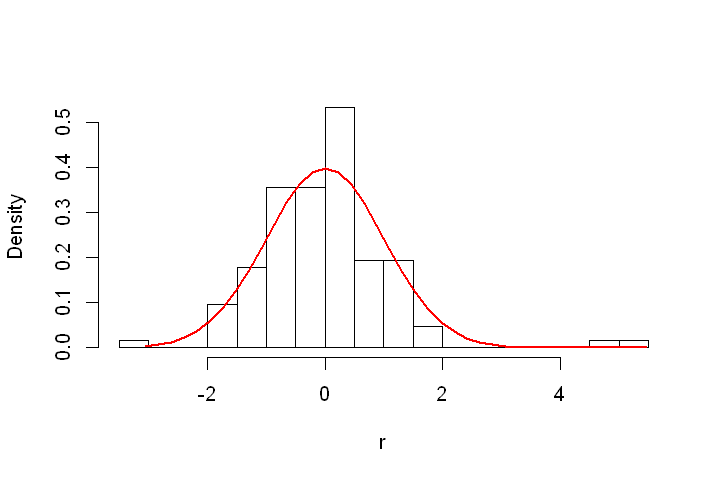

In [111]:
summary(lme_S)
ranef(lme_S)
summary(lme_S)$tTable
attributes(summary(lme_S))
#intervals(lme_S)
anova(lme_S)
pseudoR2(y=TBI_GreenTea$S, # [omdecomp_data$TauxDecomposition_C > 0]
         y_hat = predict(lme_S, level=2))
residues(lme_S)

In [112]:
head(TBI_rooibos)

,k_tbi,TeaType,Farmers,DoseN,Site,NitrogenType
37,0.004613835,Rooibos tea,Belanger,0,A9,N-8-0-0
38,0.005033486,Rooibos tea,Belanger,0,A9,N-8-0-0
39,0.007907971,Rooibos tea,Belanger,0,A9,N-8-0-0
40,0.008762639,Rooibos tea,Belanger,0,A9,N-8-0-0
41,0.004679658,Rooibos tea,Belanger,0,A9,N-8-0-0
42,0.005238998,Rooibos tea,Belanger,0,A9,N-8-0-0


In [113]:
lme_TBI <- lme(fixed = k_tbi ~  DoseN + NitrogenType,
    random = ~ 1 | Farmers/Site, #/DoseRep,
    data = TBI_rooibos) # [omdecomp_data$TauxDecomposition_C > 0, ]

In [114]:
summary(lme_TBI)

Linear mixed-effects model fit by REML
 Data: TBI_rooibos 
        AIC       BIC   logLik
  -1201.875 -1179.377 608.9374

Random effects:
 Formula: ~1 | Farmers
        (Intercept)
StdDev: 0.001058691

 Formula: ~1 | Site %in% Farmers
         (Intercept)    Residual
StdDev: 0.0006061399 0.001526043

Fixed effects: k_tbi ~ DoseN + NitrogenType 
                           Value    Std.Error  DF   t-value p-value
(Intercept)          0.006164356 0.0008636613 120  7.137469  0.0000
DoseN                0.000003116 0.0000066639 120  0.467635  0.6409
NitrogenTypeN-6-1-1  0.002000522 0.0005863409 120  3.411876  0.0009
NitrogenTypeN-8-0-0  0.000668290 0.0006995885 120  0.955262  0.3414
NitrogenTypeN-SCU   -0.000407511 0.0006884892 120 -0.591892  0.5550
 Correlation: 
                    (Intr) DoseN  NTN-6- NTN-8-
DoseN               -0.237                     
NitrogenTypeN-6-1-1 -0.113 -0.165              
NitrogenTypeN-8-0-0 -0.209  0.029  0.536       
NitrogenTypeN-SCU   -0.020 -0.131  0.0

In [115]:
ranef(lme_TBI)

,(Intercept)
Belanger,-0.0006731745
Fortier,0.0006731745
,(Intercept)
Belanger/10,-0.0005293725
Belanger/A9,0.0003087068
Fortier/45,0.0003491925
Fortier/9,-0.0001285268


In [116]:
summary(lme_TBI)$tTable

,Value,Std.Error,DF,t-value,p-value
(Intercept),6.164356e-03,8.636613e-04,120,7.1374693,7.871002e-11
DoseN,3.116282e-06,6.663922e-06,120,0.4676347,6.408939e-01
NitrogenTypeN-6-1-1,2.000522e-03,5.863409e-04,120,3.4118758,8.799726e-04
NitrogenTypeN-8-0-0,6.682900e-04,6.995885e-04,120,0.9552616,3.413659e-01
NitrogenTypeN-SCU,-4.075112e-04,6.884892e-04,120,-0.5918920,5.550364e-01


In [117]:
attributes(summary(lme_TBI))

$names
 [1] "modelStruct"  "dims"         "contrasts"    "coefficients" "varFix"      
 [6] "sigma"        "apVar"        "logLik"       "numIter"      "groups"      
[11] "call"         "terms"        "method"       "fitted"       "residuals"   
[16] "fixDF"        "na.action"    "data"         "corFixed"     "tTable"      
[21] "BIC"          "AIC"         

$class
[1] "summary.lme" "lme"        

$verbose
[1] FALSE

$oClass
[1] "lme"

In [118]:
intervals(lme_TBI)

Approximate 95% confidence intervals

 Fixed effects:
                            lower          est.        upper
(Intercept)          4.454367e-03  6.164356e-03 7.874345e-03
DoseN               -1.007782e-05  3.116282e-06 1.631038e-05
NitrogenTypeN-6-1-1  8.396081e-04  2.000522e-03 3.161436e-03
NitrogenTypeN-8-0-0 -7.168465e-04  6.682900e-04 2.053426e-03
NitrogenTypeN-SCU   -1.770672e-03 -4.075112e-04 9.556494e-04
attr(,"label")
[1] "Fixed effects:"

 Random Effects:
  Level: Farmers 
                       lower        est.       upper
sd((Intercept)) 0.0001646521 0.001058691 0.006807244
  Level: Site 
                       lower         est.       upper
sd((Intercept)) 9.370808e-05 0.0006061399 0.003920746

 Within-group standard error:
      lower        est.       upper 
0.001344597 0.001526043 0.001731973 

In [119]:
anova(lme_TBI)

,numDF,denDF,F-value,p-value
(Intercept),1,120,64.337170,7.901457e-13
DoseN,1,120,1.232408,2.691589e-01
NitrogenType,3,120,4.453493,5.283390e-03


In [120]:
pseudoR2(y=TBI_rooibos$k_tbi, # [omdecomp_data$TauxDecomposition_C > 0]
         y_hat = predict(lme_TBI, level=1))

[1] 0.3004398

[1] "Shapiro-Wilk:"

	Shapiro-Wilk normality test

data:  r
W = 0.9734, p-value = 0.01268

[1] "Kurtosis: 0.247117301424066"
[1] "Skewness: 0.52312331964216"


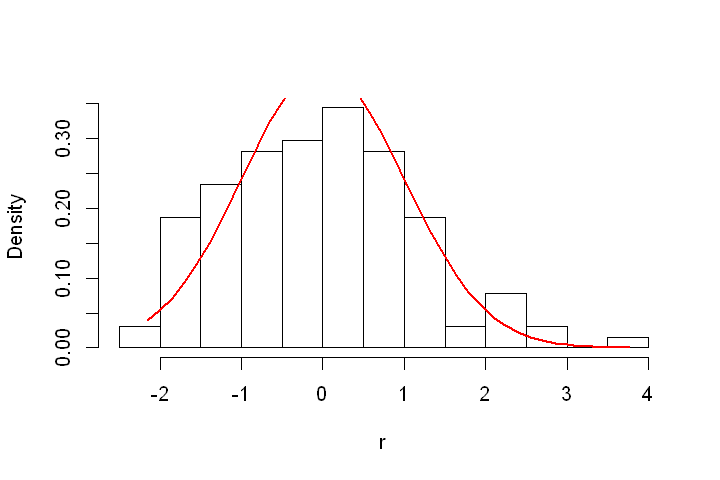

In [121]:
residues(lme_TBI)

In [122]:
S_data = donnee %>%
  select(S, TeaType, DoseN, Farmers,Site, #C_over_N, 
         NitrogenType) %>%
  drop_na(.) %>%
  droplevels(.)
#TBI_data_factor <- TBI_data
#TBI_data_factor$TeaType <- factor(TBI_data$TeaType, 
#                                      levels = levels(omdecomp_data$TeaType)[c(4,3,5,2,1)]) # Reorder

In [123]:
TBI_GreenTea <- subset(S_data, TeaType == "Green tea")

In [124]:
lme_S <- lme(fixed = S ~  DoseN + NitrogenType,
               random = ~ 1 | Farmers/Site, #/DoseRep,
               data = TBI_GreenTea) # [omdecomp_data$TauxDecomposition_C > 0, ]

In [125]:
summary(lme_S)

Linear mixed-effects model fit by REML
 Data: TBI_GreenTea 
       AIC      BIC  logLik
  -279.136 -256.903 147.568

Random effects:
 Formula: ~1 | Farmers
         (Intercept)
StdDev: 3.723227e-06

 Formula: ~1 | Site %in% Farmers
        (Intercept)   Residual
StdDev:  0.04299008 0.06224558

Fixed effects: S ~ DoseN + NitrogenType 
                          Value  Std.Error  DF   t-value p-value
(Intercept)          0.24656689 0.02701601 116  9.126694  0.0000
DoseN                0.00042329 0.00027815 116  1.521808  0.1308
NitrogenTypeN-6-1-1  0.11853217 0.05742880 116  2.063985  0.0412
NitrogenTypeN-8-0-0  0.05705259 0.05169629 116  1.103611  0.2720
NitrogenTypeN-SCU   -0.00689129 0.02030607 116 -0.339371  0.7349
 Correlation: 
                    (Intr) DoseN  NTN-6- NTN-8-
DoseN               -0.303                     
NitrogenTypeN-6-1-1 -0.409 -0.061              
NitrogenTypeN-8-0-0 -0.473 -0.006  0.846       
NitrogenTypeN-SCU   -0.021 -0.217  0.054  0.047

Standardized Withi

In [126]:
ranef(lme_S)

,(Intercept)
Belanger,1.269479e-10
Fortier,-1.269479e-10
,(Intercept)
Belanger/10,1.692478e-02
Belanger/A9,4.672425e-17
Fortier/45,3.045139e-02
Fortier/9,-4.737618e-02


In [127]:
summary(lme_S)$tTable

,Value,Std.Error,DF,t-value,p-value
(Intercept),0.2465668857,0.027016012,116,9.1266943,2.635135e-15
DoseN,0.0004232879,0.000278148,116,1.5218079,1.307786e-01
NitrogenTypeN-6-1-1,0.1185321737,0.057428804,116,2.0639847,4.124955e-02
NitrogenTypeN-8-0-0,0.0570525938,0.051696286,116,1.1036111,2.720460e-01
NitrogenTypeN-SCU,-0.0068912866,0.020306074,116,-0.3393707,7.349441e-01


In [128]:
attributes(summary(lme_S))

$names
 [1] "modelStruct"  "dims"         "contrasts"    "coefficients" "varFix"      
 [6] "sigma"        "apVar"        "logLik"       "numIter"      "groups"      
[11] "call"         "terms"        "method"       "fitted"       "residuals"   
[16] "fixDF"        "na.action"    "data"         "corFixed"     "tTable"      
[21] "BIC"          "AIC"         

$class
[1] "summary.lme" "lme"        

$verbose
[1] FALSE

$oClass
[1] "lme"

In [129]:
anova(lme_S)

,numDF,denDF,F-value,p-value
(Intercept),1,116,154.592930,0.00000000
DoseN,1,116,2.897476,0.09139685
NitrogenType,3,116,1.972322,0.12198490


In [130]:
pseudoR2(y=TBI_GreenTea$S, # [omdecomp_data$TauxDecomposition_C > 0]
         y_hat = predict(lme_S, level=2))

[1] 0.3632854

[1] "Shapiro-Wilk:"

	Shapiro-Wilk normality test

data:  r
W = 0.89594, p-value = 8.34e-08

[1] "Kurtosis: 6.33426604324906"
[1] "Skewness: 1.45996663413087"


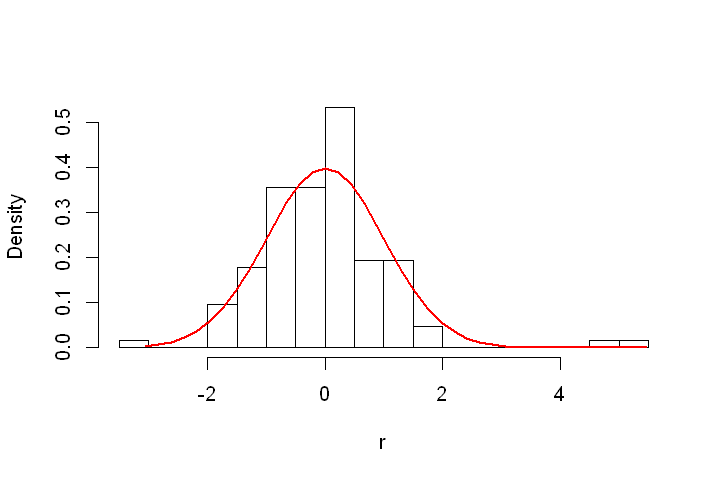

In [131]:
residues(lme_S)

In [132]:
weightdiff_gg_S = data.frame(intervals(lme_S, which = "fixed")$fixed)

In [133]:
weightdiff_gg_S$pvalue = summary(lme_S)$tTable[, 5]

In [134]:
weightdiff_gg_S$is_significant = ifelse(weightdiff_gg_S$pvalue <= 0.05,
                                      'Significant at 0.05 level',
                                      'Not significant at 0.05 level')

In [135]:
weightdiff_gg_S$variable = rownames(weightdiff_gg_S)

In [136]:
weightdiff_gg_S$variable

[1] "(Intercept)"         "DoseN"               "NitrogenTypeN-6-1-1"
[4] "NitrogenTypeN-8-0-0" "NitrogenTypeN-SCU"

In [137]:
weightdiff_gg_S$variable[c(3,4,5)] <- c('N-6-1-1', 'N-8-0-0',
                                   'N-SCU-39-0-0')

In [138]:
weightdiff_gg_S$facet = factor(c('Intercept','N dosage',
                               'N source', 'N source', 'N source'))

In [139]:
weightdiff_gg_S = weightdiff_gg_S[-1, ] # remove the intercept

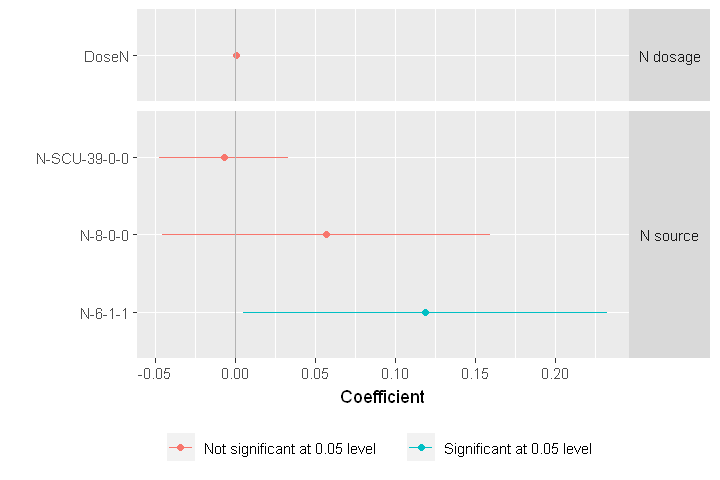

In [140]:
ggplot(weightdiff_gg_S, aes(x = est., y=variable, colour=is_significant)) +
  facet_grid(facet ~ ., scales = 'free', space = 'free') +
  geom_point() +
  geom_segment(aes(x=lower, xend=upper, y=variable, yend=variable)) +
  geom_vline(xintercept = 0, colour='grey70') +
  xlab('Coefficient') +
  ylab('') +
  theme(strip.text.y = element_text(angle=0),
        legend.title = element_blank(),
        legend.position = "bottom")

In [141]:
ggsave("Figure6.png", width = 8, height = 5, dpi = 600)# export plot high resolution

In [ ]:
# End 

In [142]:
mean_S <- mean(S_data$S)

In [154]:
mean_S

[1] 0.2746737

In [155]:
sd_S <- sd(S_data$S)

In [156]:
sd_S

[1] 0.07612292

In [157]:
S_data = donnee %>%
  select(S, TeaType, DoseN, Farmers,Site, #C_over_N, 
         NitrogenType) %>%
  drop_na(.) %>%
  droplevels(.)
#TBI_data_factor <- TBI_data
#TBI_data_factor$TeaType <- factor(TBI_data$TeaType, 
#                                      levels = levels(omdecomp_data$TeaType)[c(4,3,5,2,1)]) # Reorder

TBI_SenchaTea <- subset(S_data, TeaType == "Sencha Tea")

In [158]:
mean_TBI_SenchaTea <- mean(TBI_SenchaTea$S, na.rm = TRUE)
mean_TBI_SenchaTea 

[1] NaN

In [159]:
sd_TBI_SenchaTea <- sd(TBI_SenchaTea$S, na.rm = TRUE)
sd_TBI_SenchaTea 

[1] NA

In [160]:


donnee$M_surM0 <- donnee$Poids_Restant_g / donnee$PoidsContenu_g
Hf_g = 0.805
Hf_cr = 0.475


donnee$a = NA
donnee$k1_tbi = NA

donnee$a[donnee$TeaType == "Green tea"] = (donnee$PoidsContenu_g[donnee$TeaType == "Green tea"] -
                                             donnee$Poids_Restant_g[donnee$TeaType == "Green tea"]) /
  donnee$PoidsContenu_g[donnee$TeaType == "Green tea"]

donnee$S = 1 - donnee$a/Hf_g
donnee$k1_tbi[donnee$TeaType == "Cranberry litter"] = log((Hf_cr/donnee$S[donnee$TeaType == "Green tea"]) / 
                                                            (donnee$M_surM0[donnee$TeaType == "Cranberry litter"]- 
                                                               (1-(Hf_cr/donnee$S[donnee$TeaType == "Green tea"])))) / 90
sdr = paste(donnee$Site, donnee$DoseN, donnee$Repetition)
sdr_u = unique(sdr)

for (i in 1:length(sdr_u)) {
  Sg_i = mean(donnee$S[sdr == sdr_u[i] & donnee$TeaType == "Green tea"], na.rm = TRUE)
  
  # Rooibos
  donnee$a[sdr == sdr_u[i] & donnee$TeaType == "Cranberry litter"] = Hf_r * (1 - Sg_i)
  acr_i = donnee$a[sdr == sdr_u[i] & donnee$TeaType == "Cranberry litter"]
  M_surM0_i = donnee$M_surM0[sdr == sdr_u[i] & donnee$TeaType == "Cranberry litter"]
  
  donnee$k1_tbi[sdr == sdr_u[i] & donnee$TeaType == "Cranberry litter"] = log(acr_i / (M_surM0_i - (1-acr_i))) / 90
  
  
}
TBI_cranberry <- subset(donnee, TeaType == "Cranberry litter")

Warning message in donnee$M_surM0[donnee$TeaType == "Cranberry litter"] - (1 - (Hf_cr/donnee$S[donnee$TeaType == :
"la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court"Warning message in donnee$k1_tbi[donnee$TeaType == "Cranberry litter"] = log((Hf_cr/donnee$S[donnee$TeaType == :
"le nombre d'objets à remplacer n'est pas multiple de la taille du remplacement"

In [163]:
mean_k1_tbi <- mean(TBI_cranberry$k1_tbi, na.rm = TRUE)
mean_k1_tbi

[1] 0.00069708

In [164]:
sd_k1_tbi <- sd(TBI_cranberry$k1_tbi, na.rm = TRUE)
sd_k1_tbi

[1] 0.001880059

In [165]:
donnee$M_surM0 <- donnee$Poids_Restant_g / donnee$PoidsContenu_g
Hf_g = 0.805
Hf_hi = 0.853


donnee$a = NA
donnee$k2_tbi = NA

donnee$a[donnee$TeaType == "Green tea"] = (donnee$PoidsContenu_g[donnee$TeaType == "Green tea"] -
                                             donnee$Poids_Restant_g[donnee$TeaType == "Green tea"]) /
  donnee$PoidsContenu_g[donnee$TeaType == "Green tea"]

donnee$S = 1 - donnee$a/Hf_g
donnee$k2_tbi[donnee$TeaType == "Hibiscus Tea"] = log((Hf_hi/donnee$S[donnee$TeaType == "Green tea"]) / 
                                                            (donnee$M_surM0[donnee$TeaType == "Hibiscus Tea"]- 
                                                               (1-(Hf_hi/donnee$S[donnee$TeaType == "Hibiscus Tea"])))) / 90
sdr = paste(donnee$Site, donnee$DoseN, donnee$Repetition)
sdr_u = unique(sdr)

for (i in 1:length(sdr_u)) {
  Sg_i = mean(donnee$S[sdr == sdr_u[i] & donnee$TeaType == "Green tea"], na.rm = TRUE)
  
  # Hibiscus
  donnee$a[sdr == sdr_u[i] & donnee$TeaType == "Hibiscus Tea"] = Hf_hi * (1 - Sg_i)
  ahi_i = donnee$a[sdr == sdr_u[i] & donnee$TeaType == "Hibiscus Tea"]
  M_surM0_i = donnee$M_surM0[sdr == sdr_u[i] & donnee$TeaType == "Hibiscus Tea"]
  
  donnee$k2_tbi[sdr == sdr_u[i] & donnee$TeaType == "Hibiscus Tea"] = log(ahi_i / (M_surM0_i - (1-ahi_i))) / 90
  
  
}
TBI_hibiscus <- subset(donnee, TeaType == "Hibiscus Tea")

Warning message in (Hf_hi/donnee$S[donnee$TeaType == "Green tea"])/(donnee$M_surM0[donnee$TeaType == :
"la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court"Warning message in donnee$k2_tbi[donnee$TeaType == "Hibiscus Tea"] = log((Hf_hi/donnee$S[donnee$TeaType == :
"le nombre d'objets à remplacer n'est pas multiple de la taille du remplacement"

In [166]:
mean_k2_tbi <- mean(TBI_hibiscus$k2_tbi, na.rm = TRUE)
mean_k2_tbi

[1] 0.00860813

In [167]:
sd_k2_tbi <- sd(TBI_hibiscus$k2_tbi, na.rm = TRUE)
sd_k2_tbi

[1] 0.00367775

In [168]:
donnee$M_surM0 <- donnee$Poids_Restant_g / donnee$PoidsContenu_g
Hf_s = 0.916
Hf_r = 0.826


donnee$a = NA
donnee$k3_tbi = NA

donnee$a[donnee$TeaType == "Sencha Tea"] = (donnee$PoidsContenu_g[donnee$TeaType == "Sencha Tea"] -
                                             donnee$Poids_Restant_g[donnee$TeaType == "Sencha Tea"]) /
  donnee$PoidsContenu_g[donnee$TeaType == "Sencha Tea"]

donnee$S = 1 - donnee$a/Hf_s
donnee$k3_tbi[donnee$TeaType == "Rooibos tea"] = log((Hf_r/donnee$S[donnee$TeaType == "Sencha Tea"]) / 
                                                            (donnee$M_surM0[donnee$TeaType == "Rooibos tea"]- 
                                                               (1-(Hf_r/donnee$S[donnee$TeaType == "Rooibos tea"])))) / 90
sdr = paste(donnee$Site, donnee$DoseN, donnee$Repetition)
sdr_u = unique(sdr)

for (i in 1:length(sdr_u)) {
  Sg_i = mean(donnee$S[sdr == sdr_u[i] & donnee$TeaType == "Sencha Tea"], na.rm = TRUE)
  
  # Hibiscus
  donnee$a[sdr == sdr_u[i] & donnee$TeaType == "Rooibos tea"] = Hf_r * (1 - Sg_i)
  ar_i = donnee$a[sdr == sdr_u[i] & donnee$TeaType == "Rooibos tea"]
  M_surM0_i = donnee$M_surM0[sdr == sdr_u[i] & donnee$TeaType == "Rooibos tea"]
  
  donnee$k3_tbi[sdr == sdr_u[i] & donnee$TeaType == "Rooibos tea"] = log(ar_i / (M_surM0_i - (1-ar_i))) / 90
  
  
}
TBI_Rooibos_sencha <- subset(donnee, TeaType == "Rooibos tea")

Warning message in (Hf_r/donnee$S[donnee$TeaType == "Sencha Tea"])/(donnee$M_surM0[donnee$TeaType == :
"la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court"

In [169]:
mean_k3_tbi <- mean(TBI_Rooibos_sencha$k3_tbi, na.rm = TRUE)
mean_k3_tbi

[1] 0.007462127

In [170]:
sd_k3_tbi <- sd(TBI_Rooibos_sencha$k3_tbi, na.rm = TRUE)
sd_k3_tbi

[1] 0.003628373

In [171]:
donnee$M_surM0 <- donnee$Poids_Restant_g / donnee$PoidsContenu_g
Hf_s = 0.916
Hf_cr = 0.476

donnee$a = NA
donnee$k4_tbi = NA

donnee$a[donnee$TeaType == "Sencha Tea"] = (donnee$PoidsContenu_g[donnee$TeaType == "Sencha Tea"] -
                                             donnee$Poids_Restant_g[donnee$TeaType == "Sencha Tea"]) /
  donnee$PoidsContenu_g[donnee$TeaType == "Sencha Tea"]

donnee$S = 1 - donnee$a/Hf_s
donnee$k4_tbi[donnee$TeaType == "Cranberry litter"] = log((Hf_cr/donnee$S[donnee$TeaType == "Sencha Tea"]) / 
                                                            (donnee$M_surM0[donnee$TeaType == "Cranberry litter"]- 
                                                               (1-(Hf_cr/donnee$S[donnee$TeaType == "Cranberry litter"])))) / 90
sdr = paste(donnee$Site, donnee$DoseN, donnee$Repetition)
sdr_u = unique(sdr)

for (i in 1:length(sdr_u)) {
  Sg_i = mean(donnee$S[sdr == sdr_u[i] & donnee$TeaType == "Sencha Tea"], na.rm = TRUE)
  
  # Hibiscus
  donnee$a[sdr == sdr_u[i] & donnee$TeaType == "Cranberry litter"] = Hf_cr * (1 - Sg_i)
  acr_i = donnee$a[sdr == sdr_u[i] & donnee$TeaType == "Cranberry litter"]
  M_surM0_i = donnee$M_surM0[sdr == sdr_u[i] & donnee$TeaType == "Cranberry litter"]
  
  donnee$k4_tbi[sdr == sdr_u[i] & donnee$TeaType == "Cranberry litter"] = log(acr_i / (M_surM0_i - (1-acr_i))) / 90
  
  
}
TBI_cranberry_sencha <- subset(donnee, TeaType == "Cranberry litter")

Warning message in (Hf_cr/donnee$S[donnee$TeaType == "Sencha Tea"])/(donnee$M_surM0[donnee$TeaType == :
"la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court"Warning message in log(acr_i/(M_surM0_i - (1 - acr_i))):
"production de NaN"

In [172]:
mean_k4_tbi <- mean(TBI_cranberry_sencha$k4_tbi, na.rm = TRUE)
mean_k4_tbi

[1] 0.001038073

In [173]:
sd_k4_tbi <- sd(TBI_cranberry_sencha$k4_tbi, na.rm = TRUE)
sd_k4_tbi

[1] 0.001615091

In [174]:
donnee$M_surM0 <- donnee$Poids_Restant_g / donnee$PoidsContenu_g
Hf_s = 0.916
Hf_hi = 0.853

donnee$a = NA
donnee$k5_tbi = NA

donnee$a[donnee$TeaType == "Sencha Tea"] = (donnee$PoidsContenu_g[donnee$TeaType == "Sencha Tea"] -
                                             donnee$Poids_Restant_g[donnee$TeaType == "Sencha Tea"]) /
  donnee$PoidsContenu_g[donnee$TeaType == "Sencha Tea"]

donnee$S = 1 - donnee$a/Hf_s
donnee$k5_tbi[donnee$TeaType == "Hibiscus Tea"] = log((Hf_hi/donnee$S[donnee$TeaType == "Sencha Tea"]) / 
                                                            (donnee$M_surM0[donnee$TeaType == "Hibiscus Tea"]- 
                                                               (1-(Hf_hi/donnee$S[donnee$TeaType == "Hibiscus Tea"])))) / 90
sdr = paste(donnee$Site, donnee$DoseN, donnee$Repetition)
sdr_u = unique(sdr)

for (i in 1:length(sdr_u)) {
  Sg_i = mean(donnee$S[sdr == sdr_u[i] & donnee$TeaType == "Sencha Tea"], na.rm = TRUE)
  
  # Hibiscus
  donnee$a[sdr == sdr_u[i] & donnee$TeaType == "Hibiscus Tea"] = Hf_hi * (1 - Sg_i)
  ahi_i = donnee$a[sdr == sdr_u[i] & donnee$TeaType == "Hibiscus Tea"]
  M_surM0_i = donnee$M_surM0[sdr == sdr_u[i] & donnee$TeaType == "Hibiscus Tea"]
  
  donnee$k5_tbi[sdr == sdr_u[i] & donnee$TeaType == "Hibiscus Tea"] = log(ahi_i / (M_surM0_i - (1-ahi_i))) / 90
  
  
}
TBI_hibiscus_sencha <- subset(donnee, TeaType == "Hibiscus Tea")

Warning message in (Hf_hi/donnee$S[donnee$TeaType == "Sencha Tea"])/(donnee$M_surM0[donnee$TeaType == :
"la taille d'un objet plus long n'est pas multiple de la taille d'un objet plus court"Warning message in donnee$k5_tbi[donnee$TeaType == "Hibiscus Tea"] = log((Hf_hi/donnee$S[donnee$TeaType == :
"le nombre d'objets à remplacer n'est pas multiple de la taille du remplacement"

In [175]:
mean_k5_tbi <- mean(TBI_hibiscus_sencha$k5_tbi, na.rm = TRUE)
mean_k5_tbi

[1] 0.008057254

In [176]:
sd_k5_tbi <- sd(TBI_hibiscus_sencha$k5_tbi, na.rm = TRUE)
sd_k5_tbi

[1] 0.002442113

In [177]:
S_data = donnee %>%
  select(S, TeaType, DoseN, Farmers,Site, #C_over_N, 
         NitrogenType) %>%
  drop_na(.) %>%
  droplevels(.)
#TBI_data_factor <- TBI_data
#TBI_data_factor$TeaType <- factor(TBI_data$TeaType, 
#                                      levels = levels(omdecomp_data$TeaType)[c(4,3,5,2,1)]) # Reorder
TBI_GreenTea <- subset(S_data, TeaType == "Green tea")